# Medical Expenses Prediction Using Linear Regression

-----

- Linear Regression works on assuming that the features(input) are linearly related to the target(output).
- Simple Linear Regression is used to predict a quantitative response using a single feature.
            
            y = a + bx
        
        where:
            y is the response(target)
            x is the feature(input)
            a is the intercept
            b is the coefficient of 

- In this notebook, we will predict medical expenses with linear regression
- First we will do simple linear regression then we will check multivariate regression


In [1]:
# importing basic libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import missingno as msn
import plotly.express as px
%matplotlib inline

# setting plot style
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 14
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
# Download the dataset
import opendatasets as od 
od.download('https://www.kaggle.com/mirichoi0218/insurance')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading insurance.zip to ./insurance


100%|██████████| 16.0k/16.0k [00:00<00:00, 2.23MB/s]

In [2]:
# Load the dataset to a dataframe
df = pd.read_csv('insurance/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Checking for Missing Values

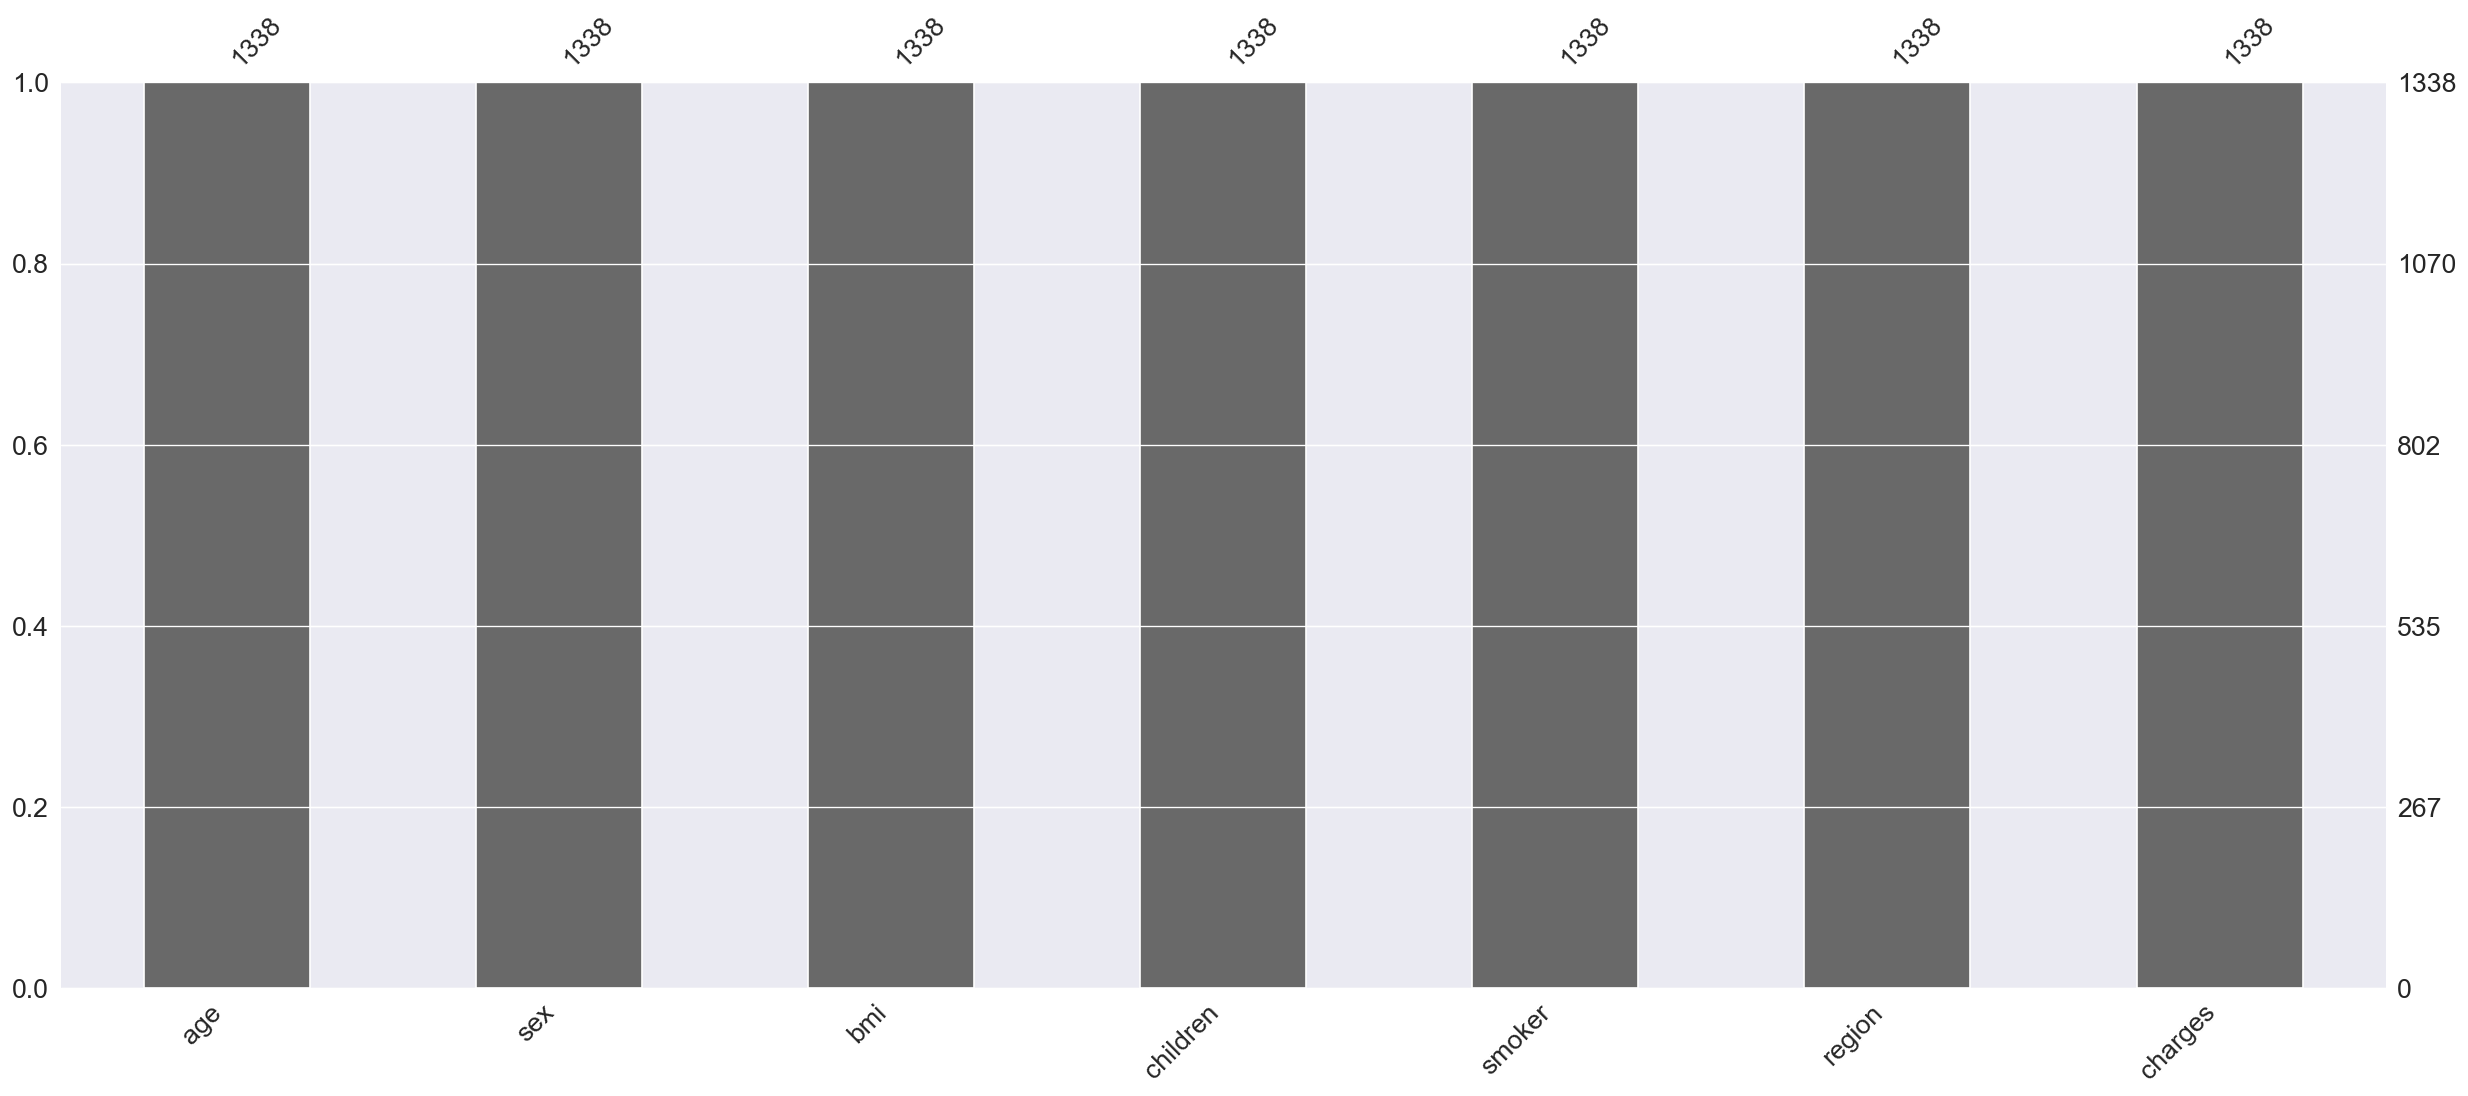

In [3]:
msn.bar(df);

There are no missing values in the dataset

### Checking for Outliers

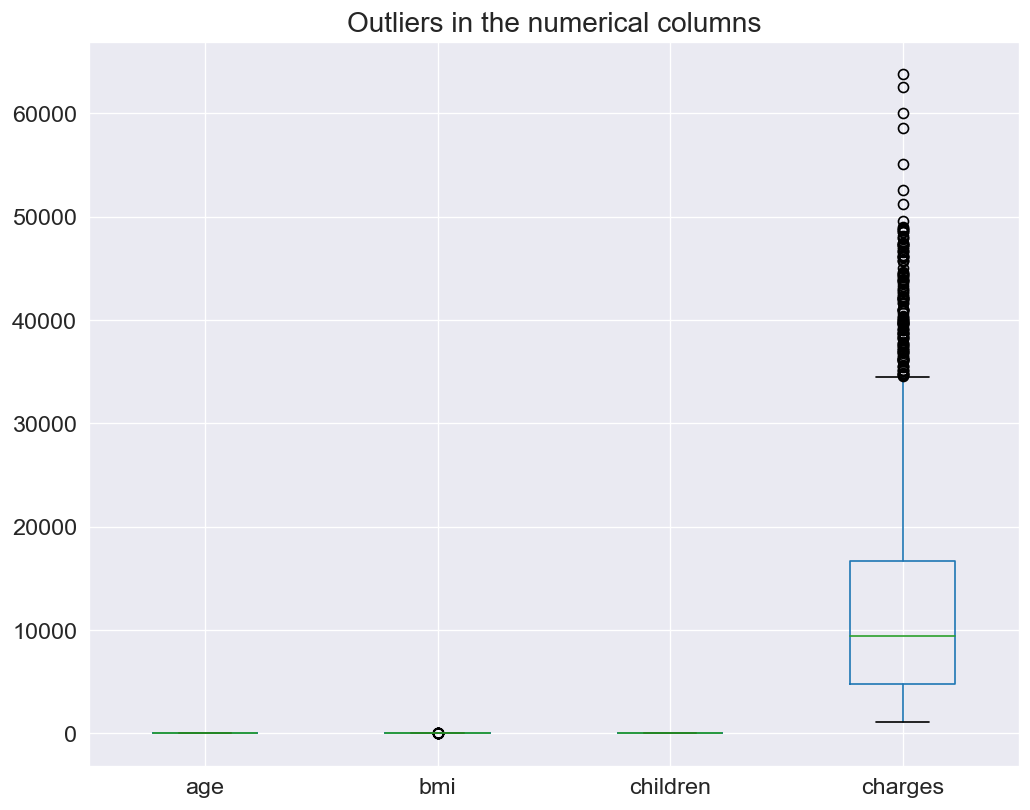

In [4]:
df.boxplot(column=['age', 'bmi', 'children', 'charges'])
plt.title('Outliers in the numerical columns')
plt.show()

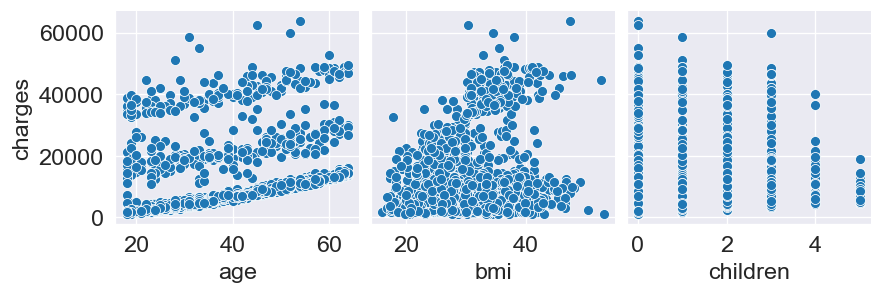

In [5]:
# Visualize the relationship between the features and the response using scatterplots
sns.pairplot(
    df,
    x_vars=['age', 'bmi', 'children'],
    y_vars='charges'
)
plt.show()

In [6]:
fig = px.histogram(
    df,
    x='age',
    marginal='box',
    nbins=47,
    color_discrete_sequence=['teal'],
    title='Distribution of Age'
)
fig.update_layout(bargap=0.1)
fig.show();

In [7]:
fig = px.histogram(
    df,
    x = 'bmi',
    marginal='box',
    color_discrete_sequence=['#d2042d'],
    title='Distribution of BMI'
)
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
fig = px.histogram(
    df,
    x ='bmi',
    marginal='box',
    color='sex',
    color_discrete_sequence=['blue', 'red'],
    title='Distribution of BMI in relation to gender'
)
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(
    df,
    x ='charges',
    marginal='box',
    color='smoker',
    color_discrete_sequence=['green', 'gray'],
    title='Annual Medical Charges'
)

fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(
    df,
    x='charges',
    color='sex',
    marginal='box',
    color_discrete_sequence=['#60cc0a', '#05d0eb'],
    title='Distribution of expenses in relation to gender'
)
fig.update_layout(bargap=0.1)
fig.show()

### Distribution of Dataset

In [11]:
# BMI vs charges

fig = px.scatter(
    df,
    x = 'bmi',
    y = 'charges',
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title='BMI vs Charges'
)
fig.update_traces(marker_size=4)
fig.show()

In [12]:
fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='smoker',
    opacity=0.8,
    hover_data=['sex'],
    title='Age vs Charges'
)
fig.show()

In [13]:
# has region any effect on charges
fig = px.scatter(
    df,
    x='age',
    y='charges',
    color='region',
    hover_data=['sex'],
    title='Age vs Charges in relation to regions'
)

fig.show()

In [14]:
# distribution of data based on region
fig = px.histogram(
    df,
    x='region',
    y='charges',
    color='smoker',
    barmode='group',
)

fig.show()

### Corelation matrix 
- This will give an idea of features that are important

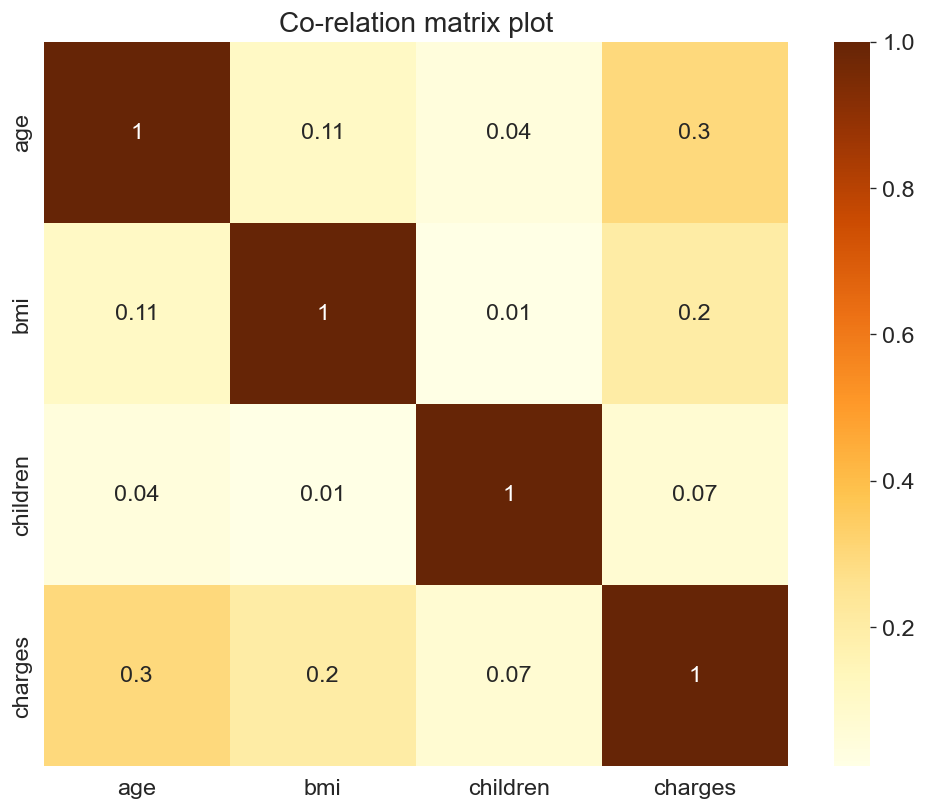

In [15]:
# Corelation
sns.heatmap(df.corr().round(2), annot=True, cmap='YlOrBr')
plt.title('Co-relation matrix plot')
plt.show()

### Simple Linear Regression

In [16]:
# import libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# initiating linear Regressor
simple_linear_regressor = LinearRegression()


# From the corelation matrix we have seen that age column is highly co-related
# The age column has no outlier,
# Hence, our feature for simple linear regression is age.
# Divide the dataset into input and output datasets
X = df[['age']]
y = df.charges

print('Shape of input data',X.shape)
print('Shape of target data', y.shape)


# split the input and output data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1, shuffle=True)

# shape of the train and test data
print('Shape of X train data',X_train.shape)
print('Shape of y train data',y_train.shape)
print('Shape of X test data',X_test.shape)
print('Shape of y test data',y_test.shape)

Shape of input data (1338, 1)
Shape of target data (1338,)
Shape of X train data (1070, 1)
Shape of y train data (1070,)
Shape of X test data (268, 1)
Shape of y test data (268,)


In [17]:
# Applying simple linear regression 
simple_linear_regressor.fit(X_train, y_train)

# prediction
slr_pred = simple_linear_regressor.predict(X_test)

# Score
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, slr_pred))) # Root mean square error 
print('R-Scored:',round(metrics.r2_score(y_test, slr_pred),2)) # R Scored 

# coefficient and intercept
slr_coef = simple_linear_regressor.coef_
slr_intercept = simple_linear_regressor.intercept_

print('Coefficient:',slr_coef)
print('Intercept:', slr_intercept)

RMSE: 11725.559391691828
R-Scored: 0.08
Coefficient: [262.31687345]
Intercept: 2998.5777306780055


## Multivariate Linear Regression
    - Scoring with multiple features.
    - Before that we need to preprocess the dataset as they have outliers


### Preprocessing dataset 

In [18]:
# Encode the categorical data
import category_encoders as ce 

# Create an encoder instance
encoder = ce.OneHotEncoder(cols=['sex', 'smoker', 'region'], handle_unknown='return_nan', return_df=True, use_cat_names=True)

# fit the encoder
encoded_df = encoder.fit_transform(df)

# checking the encoded dataframe
encoded_df.head()

,age,sex_female,sex_male,bmi,children,smoker_yes,smoker_no,region_southwest,region_southeast,region_northwest,region_northeast,charges
0,19,1.0,0.0,27.900,0,1.0,0.0,1.0,0.0,0.0,0.0,16884.92400
1,18,0.0,1.0,33.770,1,0.0,1.0,0.0,1.0,0.0,0.0,1725.55230
2,28,0.0,1.0,33.000,3,0.0,1.0,0.0,1.0,0.0,0.0,4449.46200
3,33,0.0,1.0,22.705,0,0.0,1.0,0.0,0.0,1.0,0.0,21984.47061
4,32,0.0,1.0,28.880,0,0.0,1.0,0.0,0.0,1.0,0.0,3866.85520


In [19]:
# Divide the dataset into input and output data
X = encoded_df.drop('charges', axis=1)
y = encoded_df['charges']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=27, shuffle=True)

# shape of the dataset
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1070, 11), (268, 11), (1070,), (268,))

In [20]:
# standardization
from sklearn.preprocessing import StandardScaler

X_train_stand = X_train.copy()
X_test_stand = X_test.copy()
# instaniating scalar
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_stand)
X_test_scaled = scaler.transform(X_test_stand)

In [22]:
# Applying multivariate linear regression
# create linear regresion instance
multi_linear_regressor = LinearRegression()

# fit linear regressor
multi_linear_regressor.fit(X_train_scaled, y_train)

# prediction
mlr_pred = multi_linear_regressor.predict(X_test_scaled)

# score:
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, mlr_pred))) # Root mean square error 
print('R-Scored:',round(metrics.r2_score(y_test, mlr_pred),2)) # R Scored 

# coefficient and intercept
mlr_coef = multi_linear_regressor.coef_
mlr_intercept = multi_linear_regressor.intercept_

print('Coefficient:',mlr_coef)
print('Intercept:', mlr_intercept)

RMSE: 6275.795658595211
R-Scored: 0.73
Coefficient: [ 3.45901919e+03 -4.52088620e+16 -4.52088620e+16  2.04400000e+03
  4.74000000e+02  2.53691314e+17  2.53691314e+17  6.88682733e+16
  7.27785962e+16  6.96006961e+16  6.87746748e+16]
Intercept: 13268.767998074953


In [27]:
# Coefficients
coef_df = pd.DataFrame({
    'features':X_train.columns,
    'coefficient':mlr_coef
})

coef_df

,features,coefficient
0,age,3.459019e+03
1,sex_female,-4.520886e+16
2,sex_male,-4.520886e+16
3,bmi,2.044000e+03
4,children,4.740000e+02
5,smoker_yes,2.536913e+17
6,smoker_no,2.536913e+17
7,region_southwest,6.886827e+16
8,region_southeast,7.277860e+16
9,region_northwest,6.960070e+16


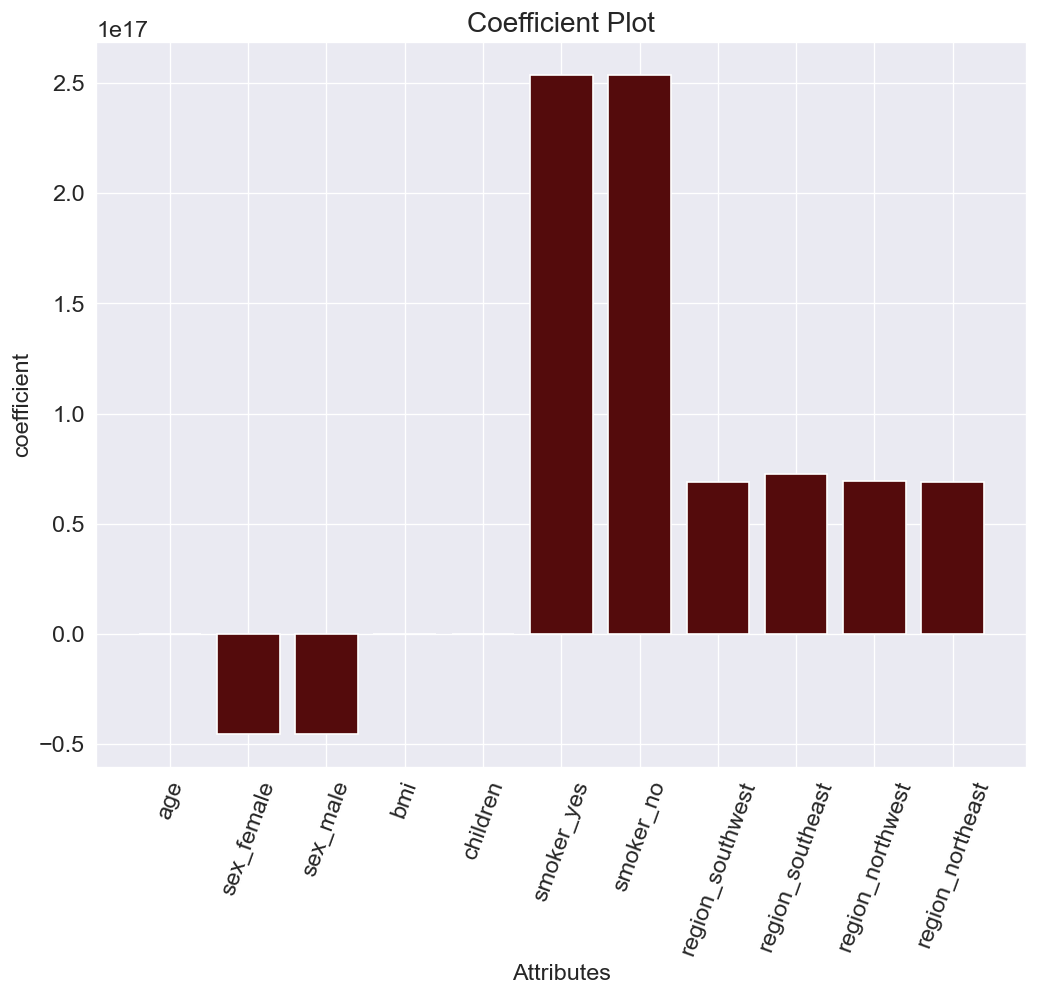

In [28]:
# Coefficient plot
plt.bar(coef_df.features, coef_df.coefficient, color='#540B0C')
plt.xlabel('Attributes')
plt.ylabel('coefficient')
plt.xticks(rotation=70)
plt.title('Coefficient Plot')
plt.show()

In [30]:
# Residuals
residuals = pd.DataFrame({
    'fitted_values': y_test,
    'predicted_values': mlr_predict
})

residuals['residual'] = residuals.fitted_values - residuals.predicted_values

residuals.head()

,fitted_values,predicted_values,residual
1034,12950.07120,16196.767998,-3246.696798
1206,36910.60803,14628.767998,22281.840032
519,3857.75925,6292.767998,-2435.008748
174,2855.43755,5364.767998,-2509.330448
71,6799.45800,7508.767998,-709.309998


In [31]:
residuals.shape

(268, 3)

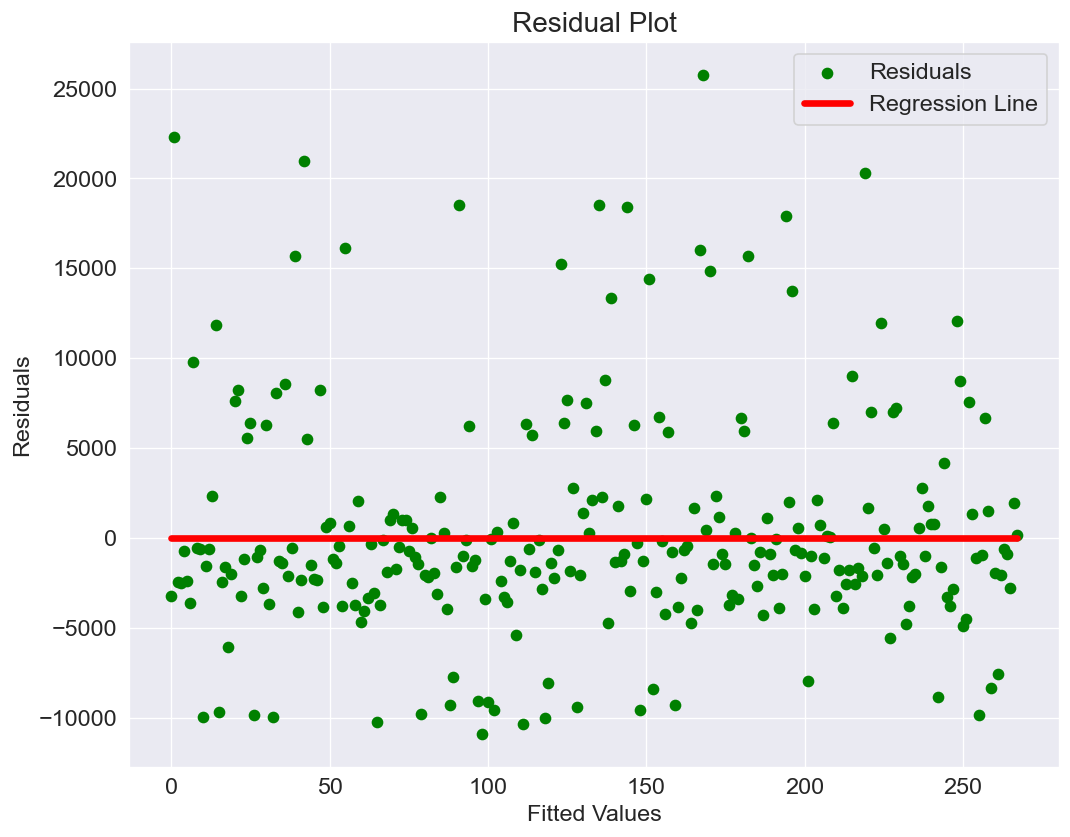

In [32]:
# Residuals plot

f = range(0,268)
k = [0 for i in range(268)]

plt.scatter(f, residuals.residual, color='green', label='Residuals')
plt.plot(f,k, color='r', linewidth=4, label='Regression Line')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()

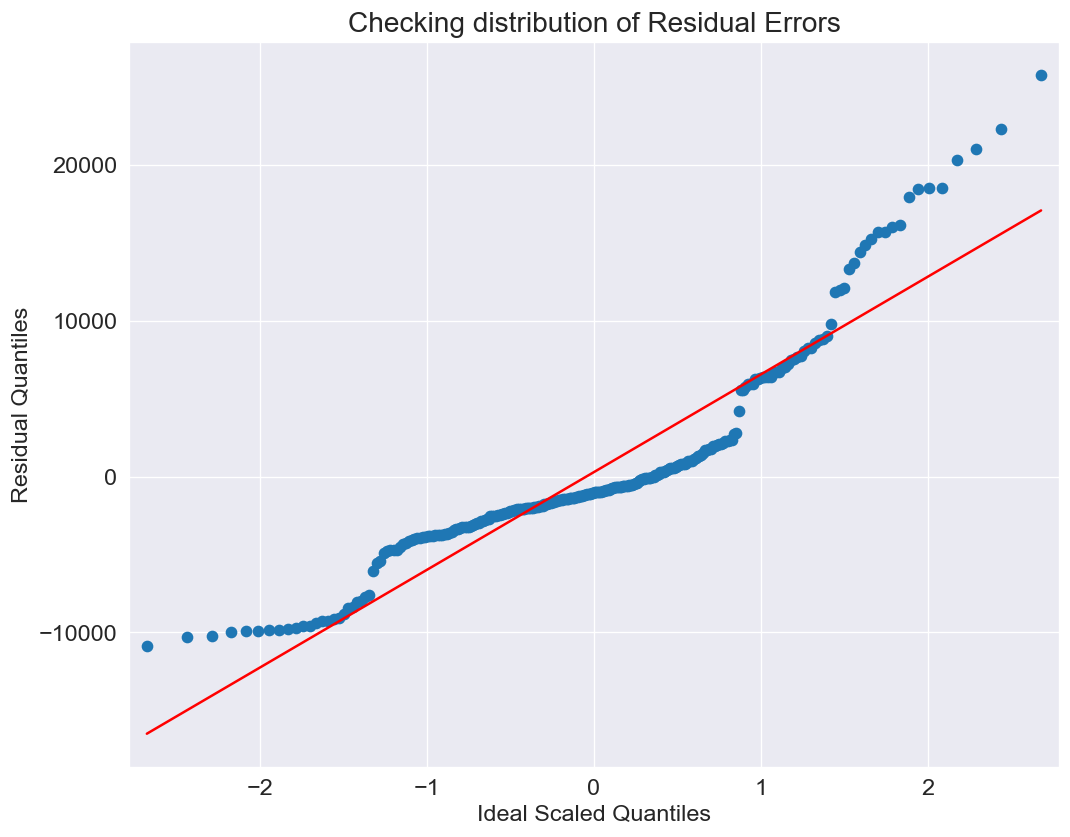

In [33]:
# QQ Plot

from statsmodels.graphics.gofplots import qqplot

fig, ax = plt.subplots()
qqplot(residuals.residual, line='s', ax=ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()